In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
tf.__version__

'2.4.0'

In [7]:
keras.__version__

'2.4.0'

In [8]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
#scaling the data 
X_val,X_tr=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_val,y_tr=y_train_full[:5000],y_train_full[5000:]

In [12]:
class_names=['tshirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankel boot']

In [13]:
class_names[y_tr[0]]

'coat'

In [14]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu',name='h1'))
model.add(keras.layers.Dense(100,activation='relu',name='h2'))
model.add(keras.layers.Dense(10,activation='softmax',name='h3'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
h1 (Dense)                   (None, 300)               235500    
_________________________________________________________________
h2 (Dense)                   (None, 100)               30100     
_________________________________________________________________
h3 (Dense)                   (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.layers

In [17]:
weg,bias=model.layers[1].get_weights()

In [18]:
len(weg)

784

In [19]:
weg

array([[-0.06615574,  0.02827864,  0.05528623, ...,  0.03620674,
         0.04876141,  0.05551164],
       [ 0.01783852,  0.00701131,  0.05607249, ..., -0.07428319,
        -0.03463236,  0.03718207],
       [ 0.03616586, -0.06600446,  0.0342896 , ..., -0.0440971 ,
         0.07123409,  0.0118136 ],
       ...,
       [-0.05012723,  0.03526284,  0.03493094, ...,  0.04587571,
        -0.02745605, -0.02454447],
       [ 0.0520073 , -0.01739986,  0.04639712, ...,  0.0128766 ,
         0.07434873,  0.00313365],
       [ 0.04058942,  0.03203396,  0.00195037, ...,  0.0477525 ,
        -0.04442561, -0.00119167]], dtype=float32)

In [20]:
len(bias)

300

In [21]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [22]:
history=model.fit(X_tr,y_tr,epochs=15,validation_data=(X_val,y_val))

Epoch 1/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9946 - accuracy: 0.6788 - val_loss: 0.5348 - val_accuracy: 0.8196
Epoch 2/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5002 - accuracy: 0.8246 - val_loss: 0.4518 - val_accuracy: 0.8428
Epoch 3/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4530 - accuracy: 0.8417 - val_loss: 0.4340 - val_accuracy: 0.8446
Epoch 4/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4275 - accuracy: 0.8480 - val_loss: 0.4104 - val_accuracy: 0.8634
Epoch 5/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4022 - accuracy: 0.8587 - val_loss: 0.3925 - val_accuracy: 0.8614
Epoch 6/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3807 - accuracy: 0.8658 - val_loss: 0.3980 - val_accuracy: 0.8642
Epoch 7/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3668 - accuracy: 0.8704 - val_loss: 0.3608 - val_accuracy:

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

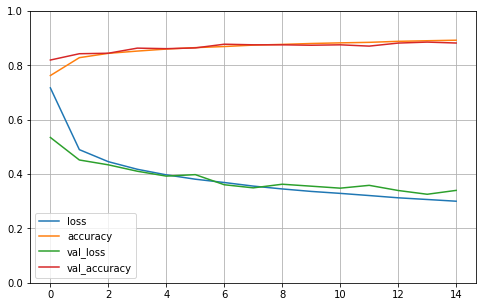

In [24]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [25]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 79.9640 - accuracy: 0.8143


[79.9639892578125, 0.814300000667572]

In [26]:
X_new=X_test[:3]

In [27]:
y_pr=model.predict(X_new)

In [28]:
y_pr

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
hh=fetch_california_housing()

In [31]:
type(hh)

sklearn.utils.Bunch

In [32]:
X_tr_f,X_test,y_tr_f,y_test=train_test_split(hh.data,hh.target)

In [33]:
X_tr,X_val,y_tr,y_val=train_test_split(X_tr_f,y_tr_f)

In [34]:
scal=StandardScaler()
X_tr_=scal.fit_transform(X_tr)
X_val_=scal.transform(X_val)
X_te_=scal.transform(X_test)

In [35]:
model_reg=keras.models.Sequential([
                                   keras.layers.Dense(30,activation='relu',input_shape=X_tr.shape[1:]),
                                  keras.layers.Dense(1)
])

In [36]:
model_reg.compile(loss='mean_squared_error',
              optimizer='sgd')

In [37]:
history_reg=model_reg.fit(X_tr_,y_tr,epochs=20,validation_data=(X_val_,y_val))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6106 - val_loss: 0.7392
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6137 - val_loss: 0.5620
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4828 - val_loss: 2.3112
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5833 - val_loss: 1.2099
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7007 - val_loss: 0.4250
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4355 - val_loss: 0.3985
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4112 - val_loss: 0.3845
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3888 - val_loss: 0.3764
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3734 - val_loss: 0.3708
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3776 - val_loss: 0.3759

In [38]:
mse_test=model_reg.evaluate(X_te_,y_test)

162/162 [==============================] - 0s 798us/step - loss: 0.3538


In [39]:
xx=X_test[:3]

In [40]:
y_test[:3]

array([0.885, 2.38 , 1.868])

In [41]:
y_pp=model_reg.predict(xx)

In [42]:
y_pp

array([[320.50214],
       [223.49884],
       [157.52339]], dtype=float32)

In [43]:
inputt=keras.layers.Input(shape=X_tr.shape[1:])
hid1=keras.layers.Dense(30,activation='relu',name='hh1')(inputt)
hid2=keras.layers.Dense(30,activation='relu',name='hh2')(hid1)
concat=keras.layers.Concatenate()([inputt,hid2])
outt=keras.layers.Dense(1)(concat)
model_11=keras.models.Model(inputs=[inputt],outputs=[outt])

In [49]:
def build_model(n_hidden=1,n_neuron=30,learning_rate=3e-3,input_shape=[8]):
  model=keras.models.Sequential()
  options={'input_shape':input_shape}
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neuron,activation='relu',**options))
    options={}
  model.add(keras.layers.Dense(1,**options))
  optimizer=keras.optimizers.SGD(learning_rate)
  model.compile(loss='mse',optimizer=optimizer)
  return model

In [51]:
keras_reg=keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [58]:
keras_reg.fit(X_tr_,y_tr,epochs=100,validation_data=(X_val_,y_val),callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_te=keras_reg.score(X_te_,y_test)


Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.4932 - val_loss: 0.6813
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6446 - val_loss: 0.6613
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6223 - val_loss: 0.5990
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5551 - val_loss: 0.5371
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5297 - val_loss: 0.4831
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5052 - val_loss: 0.4636
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4551 - val_loss: 0.4536
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4549 - val_loss: 0.4441
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4496 - val_loss: 0.4368
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4340 - val_lo

In [61]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [62]:
param_distb={
    'n_hidden':[0,1,2,3,4,5],
    'n_neuron':np.arange(1,100),
    'learning_rate':reciprocal(3e-4,3e-2)
}

In [63]:
rnd_cv=RandomizedSearchCV(keras_reg,param_distb,n_iter=10,cv=3)
rnd_cv.fit(X_tr_,y_tr,epochs=100,validation_data=(X_val_,y_val),callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 5.2899 - val_loss: 1.9466
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 1.6485 - val_loss: 1.0020
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.9224 - val_loss: 0.7968
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7965 - val_loss: 0.7337
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7384 - val_loss: 0.7033
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7424 - val_loss: 0.6830
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6989 - val_loss: 0.6684
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6410 - val_loss: 0.6547
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6598 - val_loss: 0.6438
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6425 - val_lo

RuntimeError: ignored